In [150]:
# This toy program uses LSTM to predict the closing stock price of a corporation (Apple Inc.)- using past 60 days stock price

In [151]:
pip install matplotlib

In [152]:
# basic libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web

# neural net libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# plot libray
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [153]:
# Stock 
# df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17',retry_count=5)
df = web.DataReader('MSFT',data_source='yahoo',start='2012-01-01',end='2021-05-13',retry_count=5)
print(df)

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2012-01-03   26.959999   26.389999  ...  64731500.0   21.749044
2012-01-04   27.469999   26.780001  ...  80516100.0   22.260885
2012-01-05   27.730000   27.290001  ...  56081400.0   22.488358
2012-01-06   28.190001   27.530001  ...  99455500.0   22.837715
2012-01-09   28.100000   27.719999  ...  59706800.0   22.537107
...                ...         ...  ...         ...         ...
2021-05-07  254.300003  251.169998  ...  27010100.0  251.878387
2021-05-10  251.729996  247.119995  ...  29299900.0  246.610550
2021-05-11  246.600006  242.570007  ...  33641600.0  245.662735
2021-05-12  244.380005  238.070007  ...  36684400.0  238.449402
2021-05-13  245.600006  241.419998  ...  29624300.0  242.470108

[2356 rows x 6 columns]


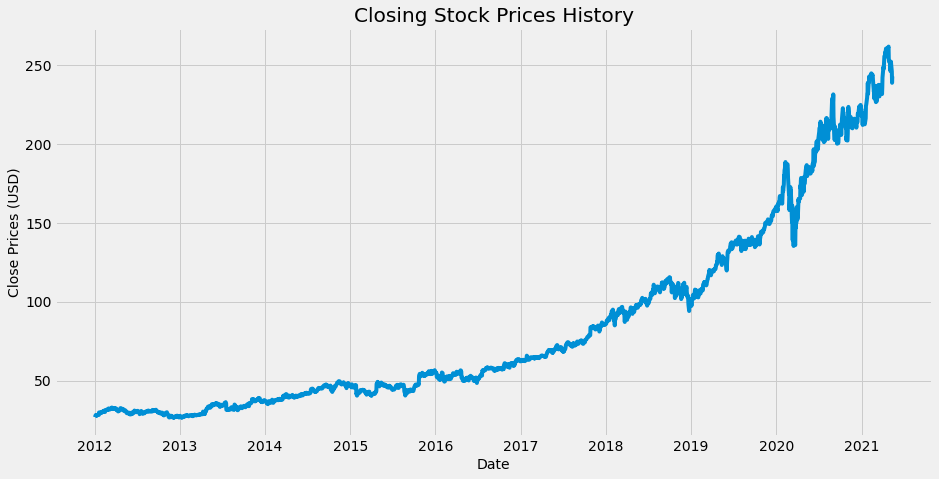

In [154]:
# visualize only closing prices history
plt.figure(figsize=(14,7))
plt.title('Closing Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Prices (USD)',fontsize=14)
plt.show()

In [155]:
# create a training data
# we pick only the closing prices and store the values into dataset
# converting dataframe 'dataset' to numpy array
data = (df.filter(['Close']))
dataset = data.values

# selects 80% of data as train data
training_data_len = math.ceil(len(dataset) * .8)

# gets num of rows to train LSTM
training_data_len




1885

In [156]:
# Scale data between 0 and 1

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# values should be now between 0 and 1 inclusive
scaled_data

array([[0.00169779],
       [0.00437181],
       [0.00556027],
       ...,
       [0.93319183],
       [0.90250424],
       [0.9196095 ]])

In [157]:
# Train Data
# Create trainining data set
# Create scaled training data set
# contains all the values from 0 to train data length with all columns
train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train datasets
# y train is target variables
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0]) # contains 60 values from index 0 to 60 ( 0-59), till 60th value. This is training data containing past 60 days values
  y_train.append(train_data[i,0]) # contains value at 60th index, a 61st value. we want the model to predict 

# check data
  if i <= 61:
    print(x_train)
    print(y_train)

    print()
    
# for the first pass through, we see the data for first 60th values
# second pass through, we see the data from 1 index to next 60 values (i.e till 61st) 


[array([0.00169779, 0.00437181, 0.00556027, 0.0073854 , 0.00581494,
       0.00623939, 0.00573004, 0.0069185 , 0.00797962, 0.00802207,
       0.00789473, 0.00742784, 0.01417656, 0.01426145, 0.01260611,
       0.01353989, 0.01328523, 0.01213921, 0.01375212, 0.01341256,
       0.01494057, 0.01519525, 0.01642614, 0.01625637, 0.01689304,
       0.01820882, 0.01867572, 0.01752971, 0.01786927, 0.01646859,
       0.01561969, 0.02088285, 0.02071307, 0.02151952, 0.02079796,
       0.02122241, 0.0216893 , 0.02113752, 0.02334465, 0.02279286,
       0.02512733, 0.024236  , 0.02304753, 0.02202886, 0.02321731,
       0.02393887, 0.02385399, 0.02406621, 0.02674023, 0.02716468,
       0.02750423, 0.02644311, 0.02474533, 0.02385399, 0.02351443,
       0.02389643, 0.02393887, 0.02640068, 0.02610356, 0.02470288])]
[0.02440576436053185]

[array([0.00169779, 0.00437181, 0.00556027, 0.0073854 , 0.00581494,
       0.00623939, 0.00573004, 0.0069185 , 0.00797962, 0.00802207,
       0.00789473, 0.00742784, 0.01

In [158]:
# converting into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


print("Before reshape", x_train.shape)


Before reshape (1825, 60)


In [159]:
# reshape the data
# LSTM model expects 3D data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("After reshape", x_train.shape)

After reshape (1825, 60, 1)


In [160]:
# LSTM Model buiding

model = Sequential()

# First LSTM layer
# adding LSTM layer, with 50 neurons, return sequence is true as we will use another LSTM layer again. This is first layer, so we define input shape



model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))

# Second LSTM layer
model.add(LSTM(50,return_sequences=False))

# Dense Layer
# Dense layer with 25 neurons and another last dense layer with 1 neuron
model.add(Dense(25))
model.add(Dense(1))



In [161]:
# Compile model

model.compile(optimizer='adam',loss= 'mean_squared_error')

In [162]:
# Train model
num_epoch = 10
model.fit(x_train,y_train,batch_size=1,epochs=num_epoch)

Epoch 1/10
1825/1825 [==============================] - 33s 17ms/step - loss: 6.1294e-04
Epoch 2/10
1825/1825 [==============================] - 31s 17ms/step - loss: 1.6177e-04
Epoch 3/10
1825/1825 [==============================] - 31s 17ms/step - loss: 1.0818e-04
Epoch 4/10
1825/1825 [==============================] - 31s 17ms/step - loss: 9.6956e-05
Epoch 5/10
1825/1825 [==============================] - 31s 17ms/step - loss: 8.6618e-05
Epoch 6/10
1825/1825 [==============================] - 31s 17ms/step - loss: 1.1548e-04
Epoch 7/10
1825/1825 [==============================] - 31s 17ms/step - loss: 5.2879e-05
Epoch 8/10
1825/1825 [==============================] - 31s 17ms/step - loss: 5.2284e-05
Epoch 9/10
1825/1825 [==============================] - 31s 17ms/step - loss: 5.6795e-05
Epoch 10/10
1825/1825 [==============================] - 31s 17ms/step - loss: 5.7211e-05


In [163]:
# Create testing dataset
# Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60:,:] # select data from 60th index to the end. select all columns

#create the datasets x_test and y_test

x_test = [] # contains past 60 values
y_test = dataset[training_data_len:,:] # contains the data which the model has to predict. Not scales -> contains true values

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [164]:
# Convert the data to numpy array
x_test = np.array(x_test)



In [165]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# x_test.shape[0] - > num of rows, or num of samples
# 1 - > num of features, as we have only one i.e, closing values

In [166]:
# Get models predicted values

predictions = model.predict(x_test)

# unscaling the values, so we can compare to y_test data set contains
predictions = scaler.inverse_transform(predictions)


In [167]:
# Evaluate the model
# Using RMSE ( low = good , high = bad)

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

6.023180238760201

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


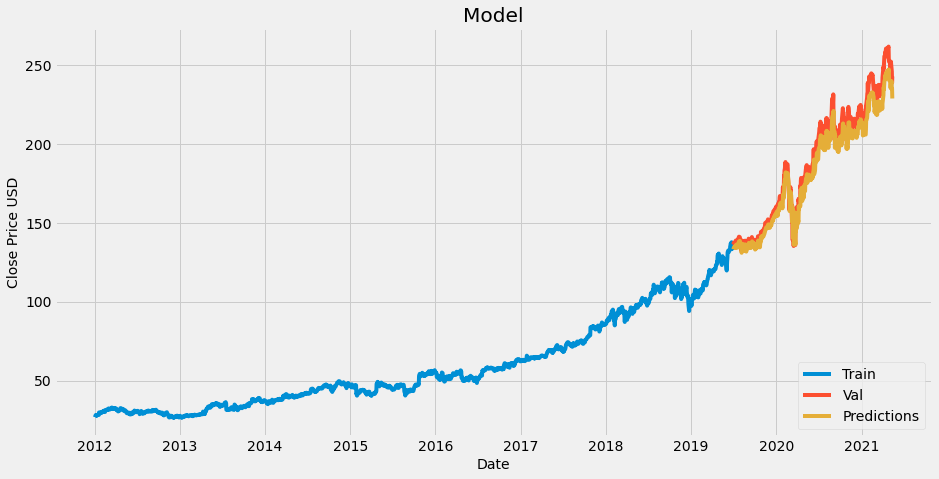

In [168]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize

plt.figure(figsize=(14,7))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc= 'lower right')
plt.show()

In [169]:
# Show the actual and predicted prices

print(valid) # actual closing prices and prediction prices


                 Close  Predictions
Date                               
2019-07-02  136.580002   133.314514
2019-07-03  137.460007   134.042191
2019-07-05  137.059998   134.840668
2019-07-08  136.960007   134.536285
2019-07-09  136.460007   134.540527
...                ...          ...
2021-05-07  252.460007   238.195175
2021-05-10  247.179993   240.042709
2021-05-11  246.229996   235.436432
2021-05-12  239.000000   235.298904
2021-05-13  243.029999   229.036118

[471 rows x 2 columns]


In [178]:
# Lets predict for another date
# Get quote
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
microsoft_quote = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2021-05-13')

# create a dataframe
# new_df = apple_quote.filter(['Close'])
new_df = microsoft_quote.filter(['Close'])

# get the last 60 days value and convert to an array
last_60_days = new_df[-60:].values

# scaling data to be valies betn 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create a list
x_test = []

# append past 60 days to x_test
x_test.append(last_60_days_scaled)

# convert the x_test to a numpy array
x_test = np.array(x_test)

# reshape to be 3D
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# get the predicted scaled prices
pred_price = model.predict(x_test)

# undo scaling
pred_price = scaler.inverse_transform(pred_price)

# print the predicted price
print(pred_price)
# this price is model predicted price 

[[233.10939]]


In [179]:
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
microsoft_quote = web.DataReader('MSFT', data_source='yahoo', start='2021-05-14', end='2021-05-14')
print(microsoft_quote['Close'])


Date
2021-05-14    248.149994
Name: Close, dtype: float64


In [180]:
microsoft_quote = web.DataReader('MSFT', data_source='yahoo', start='2021-05-13', end='2021-05-13')
print(microsoft_quote['Close'])

Date
2021-05-13    243.029999
Name: Close, dtype: float64
